# Context

For context, the Grammys and Recording Academy website used to be combined into one website - the Grammys website - until February of 2022. Afterwards, the Grammys website analytics were maintained after the split, but the Recording Academy website analytics were considered to be from a new website. That's why there's a rec_academy dataframe and a full_df dataframe. The "full" one contains data from the Grammys website - both before and after the split. The rec_academy website only contains data from the new Recording Academy website from after the split.

# Analysis

## Initialization

To begin my analysis, I imported the necessary tools, read in the dataframes, and then created two new dataframes: one for the Grammys website data pre-split, and one for the Grammys website data post-split. I then sampled the dataframes to see what I was working with.

In [177]:
# Import libraries
import pandas as pd
import plotly.express as px

In [178]:
# Read in dataframes
full_df = pd.read_csv("datasets/grammy_live_web_analytics.csv")
rec_academy = pd.read_csv("datasets/ra_live_web_analytics.csv")

# Create new dataframes
combined_site = full_df[full_df["date"] < "2022-02-01"]
grammys = full_df[full_df["date"] >= "2022-02-01"]

# Ensures that pandas won't throw me any warnings.
combined_site = combined_site.copy()
grammys = grammys.copy()

In [179]:
# preview full_df dataframe
full_df.sample(5)

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
1313,2020-08-06,15105,28705,16552,7696,94,0,0
2160,2022-12-01,22518,59598,24790,10816,76,0,0
2058,2022-08-21,12725,29389,13832,7123,79,0,0
349,2017-12-16,17759,29059,19142,9675,86,0,0
854,2019-05-05,14305,20290,15040,7537,67,0,0


In [180]:
# preview rec_academy dataframe
rec_academy.sample(5)

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
437,2023-04-14,1325,4259,1651,941,136,0,0
398,2023-03-06,1835,8505,2386,525,188,0,0
216,2022-09-05,851,2901,1003,88,109,0,0
466,2023-05-13,774,1995,947,633,100,0,0
104,2022-05-16,1085,2626,1219,808,98,0,0


In [181]:
# Preview grammys pre-split dataframe
combined_site.sample(5)

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
699,2018-12-01,12955,19490,13588,8368,65,0,0
284,2017-10-12,13867,20706,14557,7889,84,0,0
1658,2021-07-17,17243,30213,18260,9244,85,0,0
289,2017-10-17,14227,23347,15085,7012,96,0,0
1420,2020-11-21,24891,48028,26896,11230,77,0,0


In [182]:
# Preview grammys post-split dataframe
grammys.sample(5)

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
2009,2022-07-03,13397,30864,14895,7371,81,0,0
2063,2022-08-26,18555,41191,20307,10375,98,0,0
2024,2022-07-18,12023,23667,13171,7363,80,0,0
2300,2023-04-20,18790,35413,19976,10274,73,0,0
2154,2022-11-25,24089,66840,26478,11235,75,0,0


## The Statistics

### Initial Inspection

Since the Grammys happen once per year, it would follow that the most views occur at or around the night of the event. To test the hypothesis, I computed the average number of visitors on award night vs. non-award nights.

In [183]:
# average number of visitors on awards nights versus other nights

# Suppresses scientific notation in float display, and show two decimal points
pd.options.display.float_format = '{:,.2f}'.format

ceremony_traffic = full_df.groupby(by="awards_night").agg({"visitors":"mean"})
ceremony_traffic.head()

,visitors
awards_night,
0,"32,388.28"
1,"1,389,590.23"


As you can see, the Grammys website receives significantly more traffic on award night - over 40 times more!

While this confirmed my suspicion, I still wanted to get a fuller picture of the story. I created three visualizations: one that shows the daily visits of the full dataframe, one that shows the daily site visits of the Grammys website post-split, and one that shows the daily visits of the Recording Academy site.

For readability, the full dataframe is green, while the split sites are in blue.

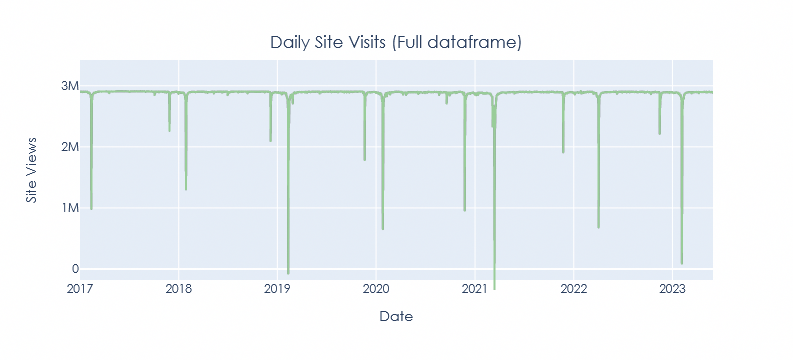

In [184]:
# Plot a line chart of the daily visitors of the full dataframe.
px.line(
    data_frame=full_df, 
    x="date", 
    y="visitors"
    
# Make pretty
).update_traces(
    line_color="#99CC99"
).update_layout(
    font={
        "family":"Century Gothic"
    },
    title={
        "text":"Daily Site Visits (Full dataframe)",
        "x":.5,
        "y":.9,
        "xanchor":"center",
        "yanchor":"top"
    },
    xaxis_title="Date",
    yaxis_title="Site Views"
)

See figure 1.

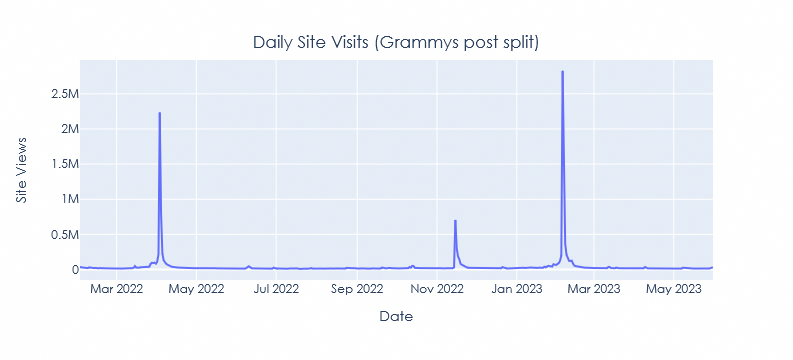

In [185]:
# Plot a line chart of the daily visitors of the grammys post-split dataframe.
px.line(
    data_frame=grammys, 
    x="date", 
    y="visitors"
    
# Make pretty
).update_layout(
    font={
        "family":"Century Gothic"
    },
    title={
        "text":"Daily Site Visits (Grammys post split)",
        "x":.5,
        "y":.9,
        "xanchor":"center",
        "yanchor":"top"
    },
    xaxis_title="Date",
    yaxis_title="Site Views"
)

See figure 2.

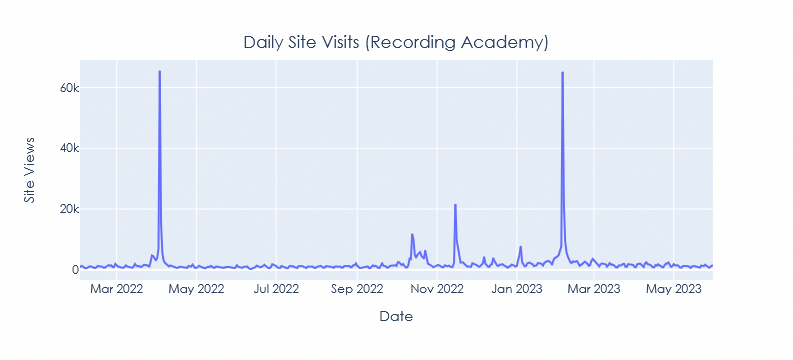

In [186]:
# Plot a line chart of the daily visitors of the rec_academy dataframe.
px.line(
    data_frame=rec_academy, 
    x="date", 
    y="visitors"
    
# Make pretty
).update_layout(
    font={
        "family":"Century Gothic"
    },
    title={
        "text":"Daily Site Visits (Recording Academy)",
        "x":.5,
        "y":.9,
        "xanchor":"center",
        "yanchor":"top"
    },
    xaxis_title="Date",
    yaxis_title="Site Views"
)

See figure 3.

On the full dataframe, the largest traffic spikes occur around January-April, corresponding the times of the show night. However, there are smaller spikes in November/December as well. These correspond to the nominee announcements.

Within the individual websites, we can see that traffic to the Grammys is significantly higher than that of the Recording Academy. However, they both have similar spikes near nominee announcements and award night. This begs the question: are users visiting the sites for the same reasons? And if so, should the split even be maintained, or should the websites be recombined?

### Engagement Metrics

At this point, I decided to focus on the effects of the website split through user engagement. This includes pages per session (how many pages someone visits before leaving), bounce rate (rate of users who don't interact and leave), and average time spent per session (amount of time spent on website before leaving). 

These metrics can help determine how good a website is at keeping users engaged. If these metrics haven't improved much, then it may be better to abandon the split site idea altogether.

#### Pages per Session

To begin my analysis, I wanted to explore the average pages per session of each dataframe. 

A "session" is a way a website keeps track of a user/state information, and allows the website to pull from the user's name, preferences, or any other settings that they have specified. It usually begins when a user logs on, and ends when they log off. A high pages per session indicates that users click on many different webpages, while a low pages per session indicates that users do not explore much before leaving.

To improve readability and writability, I grouped the dataframes in a loop so that they could be iterated over later.

In [187]:
# create the `pages_per_session` column for all 3 dataframes.
frames = [combined_site, grammys, rec_academy]

for frame in frames:
    frame["pages_per_session"] = frame["pageviews"] / frame["sessions"]

I then visualized this data using line graphs depicting average pages per session for each dataframe. For readability, the pre-split data is represented in the red line graph, while the post-split data is represented in the blue line graph.

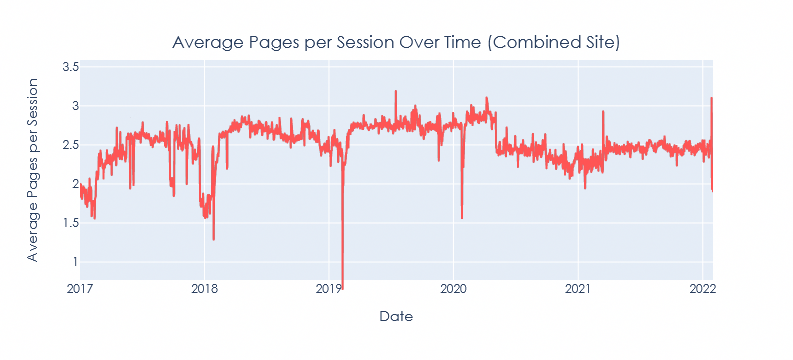

In [ ]:
# combined_site graph
px.line(
    data_frame=combined_site, 
    x="date", 
    y="pages_per_session"
    
# Make pretty
).update_traces(
    line_color="#FF5555"
).update_layout(
    font={
        "family":"Century Gothic"
    },
    title={
        "text":"Average Pages per Session Over Time (Combined Site)",
        "x":.5,
        "y":.9,
        "xanchor":"center",
        "yanchor":"top"
    },
    xaxis_title="Date",
    yaxis_title="Average Pages per Session"
)

See figure 4.

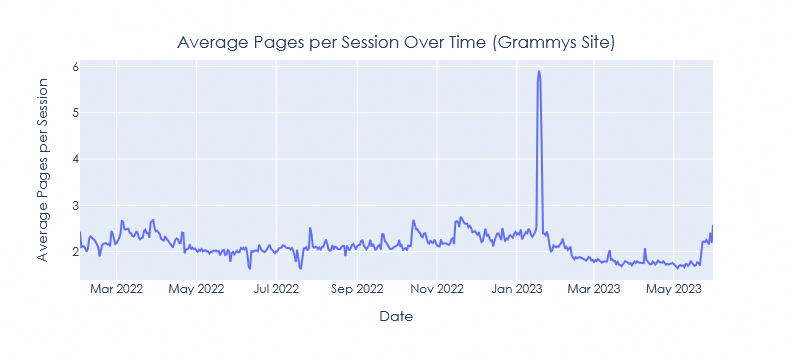

In [ ]:
# grammys graph
px.line(
    data_frame=grammys, 
    x="date", 
    y="pages_per_session"
).update_layout(
    bargap=.1,
    font={
        "family":"Century Gothic"
    },
    title={
        "text":"Average Pages per Session Over Time (Grammys Site)",
        "x":.5,
        "y":.9,
        "xanchor":"center",
        "yanchor":"top"
    },
    xaxis_title="Date",
    yaxis_title="Average Pages per Session"
)

See figure 5.

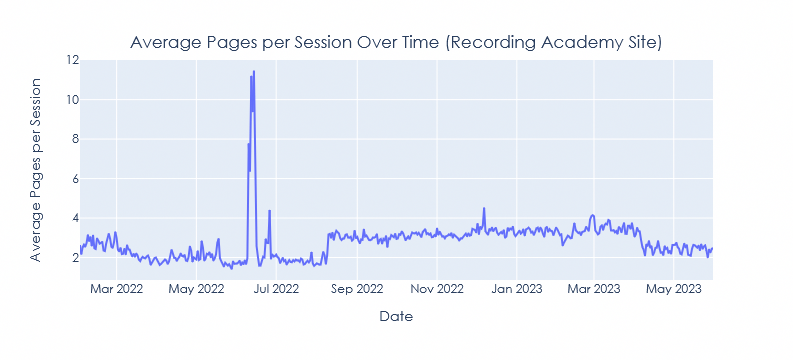

In [ ]:
# rec_academy graph
px.line(
    data_frame=rec_academy, 
    x="date", 
    y="pages_per_session"
).update_layout(
    bargap=.1,
    font={
        "family":"Century Gothic"
    },
    title={
        "text":"Average Pages per Session Over Time (Recording Academy Site)",
        "x":.5,
        "y":.9,
        "xanchor":"center",
        "yanchor":"top"
    },
    xaxis_title="Date",
    yaxis_title="Average Pages per Session"
)

See figure 6.

Surprisingly, despite splitting content across two website, the split greatly increased engagement. Pages per session increased from around 1.5~ usually to 2.5~ usually. It seems that with more focused websites, users were much more engaged.

#### Bounce Rate

I then analyzed the bounce rate, which also needed to be calculated. A "bounced" session is a session in which users come to the site, never interact with the page, and then leave.

A site with a high amount of bouncing users may have an unintuitive or unengaging homepage, indicating necessary change.

For easier code, I wrote a small function to give each dataframe a bounce_rate column, and then applied it to all three dataframes in a loop.

Since the data is one dimensional, I opted to print the data as opposed to a visualization.

In [ ]:
def bounce_rate(dataframe):
    '''
    Calculates the bounce rate for visitors on the website.
    input: dataframe with bounced_sessions and sessions columns
    output: numeric value from bounce rate
    '''
    
    sum_bounced = sum(dataframe["bounced_sessions"])
    sum_sessions = sum(dataframe["sessions"])
    return 100 * sum_bounced / sum_sessions

In [ ]:
# Calculate bounce_rate for each site

# Give frames a name attribute so the name can be displayed with the bounce rate
combined_site.name = "Combined Site"
grammys.name = "Grammys"
rec_academy.name = "Recording Academy"

for frame in frames:
    print(f"The bounce rate for {frame.name} is {bounce_rate(frame):.2f}")

The bounce rate for Combined Site is 41.58
The bounce rate for Grammys is 40.16
The bounce rate for Recording Academy is 33.67


The bounce rate for each site is lower now than before, which is evidence that the split was beneficial. The Recording Academy website bounce rate descreased much more than the Grammys website bounce rate. This may indicate that users interested in the Recording Academy as a whole are more engaged than those interested in the Grammys.

#### Average Time on Site

To further explore this difference in site engagement, I calculated the average time spent on the site across all time. No dates included.

Since there's only one dimension to this statistic, I just printed the output without visualizations.

In [ ]:
# Calculate the average of the avg_session_duration_secs
for frame in frames:
    average_time_on_site = frame["avg_session_duration_secs"].mean()
    print(f"The average time on site {frame.name} is {average_time_on_site:.2f} seconds")

The average time on site Combined Site is 102.85 seconds
The average time on site Grammys is 82.99 seconds
The average time on site Recording Academy is 128.50 seconds


This gives further credence to the claim that the Recording Academy site has a more engaged user base than the Grammys site. Unlike the previous 2 statistics, the Grammys site actually does worse than the combined site on the metric of average views per site. However, its bounce rate and pages per session is noteable better than the combined site. This suggests that, while users do not stay on the Grammys site as long, they are more likely to explore and less likely to bounce, justifying the existence of the split.

### Demographics (Age Groups)

To really squeeze out all the insights I could, I then turned to the age group data. This data can help owners coordinate their research and marketing towards certain groups, as well as any differences between the sites.

To begin, I read in two additional datasets: age_grammys and age_tra. These datasets contain data about the proportions of users of each website in age group buckets.

In [ ]:
# Read in the files
age_grammys = pd.read_csv("datasets/grammys_age_demographics.csv")
age_tra = pd.read_csv("datasets/tra_age_demographics.csv")

In [ ]:
# Preview the age_grammys file
age_grammys.head(6)

,age_group,pct_visitors
0,18-24,27.37
1,25-34,24.13
2,35-44,18.72
3,45-54,13.57
4,55-64,9.82
5,65+,6.39


In [ ]:
# Preview the age_tra file
age_tra.head(6)

,age_group,pct_visitors
0,18-24,27.12
1,25-34,26.16
2,35-44,19.55
3,45-54,13.82
4,55-64,8.24
5,65+,5.12


To simplify my analysis, I needed to combine the dataframes into one dataframe. In order to differentiate between the two, I gave each dataframe a column corresponding to their name. That way, when the dataframes were combined, I could differentiate between the data while having the dataframes in one convenient place.

In [ ]:
# Label rows as 'Recording Academy'
age_tra["website"] = "Recording Academy"

# Label rows as 'Grammys'
age_grammys["website"] = "Grammys"

In [ ]:
# Concatenate dataframes
age_df = pd.concat([age_tra, age_grammys])

# Preview combined data
age_df.sample(5)

,age_group,pct_visitors,website
5,65+,5.12,Recording Academy
0,18-24,27.37,Grammys
0,18-24,27.12,Recording Academy
2,35-44,18.72,Grammys
2,35-44,19.55,Recording Academy


I then summarized the data in a bar graph, showing the proportion of visitors in age group buckets across both sites.

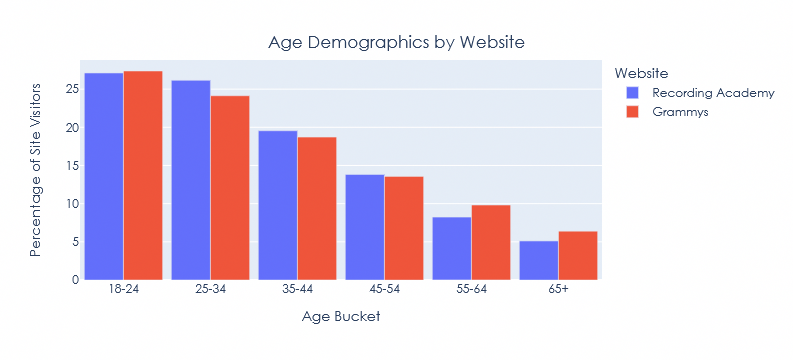

In [ ]:
# age_group and pct_visitors bar chart
px.bar(
    age_df, 
    x="age_group", 
    y="pct_visitors", 
    color="website", 
    barmode="group"

# Make pretty
).update_layout(
    bargap=.1,
    font={
        "family":"Century Gothic"
    },
    legend_title="Website",
    title={
        "text":"Age Demographics by Website",
        "x":.5,
        "y":.9,
        "xanchor":"center",
        "yanchor":"top"
    },
    xaxis_title="Age Bucket",
    yaxis_title="Percentage of Site Visitors"
)

See figure 7.

Age demographics are relatively simple across both sites, although the Recording Academy tends to have a slightly higher percentage of older users. Unfortunately, not much has been gleaned.

# Summary

Both before and after the split, these websites were and still are visited mostly on award night, with a secondary spike on the nominee announcements.

Following the split, the Grammys website was more popular than the Recording Academy website by a long shot. However, both websites had more pages per session and a lower bounce rate than the combined site. This suggests that the split websites do a better job at "hooking" users. 

Contradictory to this is the average time per session. It seems that the Grammys site actually has the lowest average time per site. However, the Grammys bounce rate and pages per session is still improved over the combined site. Thus, while users may not stay on the website as long, they are making more of their page visits as compared to the pre-split website.

As for the demographics, these websites are mostly visited by people in the 18-24 age bracket, with each next bracket dwindling in their proportion of visits. The Grammys website is slightly more popular with older visitors, although this is not particularly influential in the grand scheme of things.

# Next Steps

At this point, I felt ready to draft a recommendation for next steps based on my analysis. While a wealth of data was collected, I decided to include only the most pertinent information to form a conclusion. 

1. Traffic remains at a relatively constant low, with large spikes on award night and asmaller spikes on nominee announcements.
2. Engagement broadly improved post split, including pages per session, bounce rate, and average time per session.
3. Demographics are similar across both sites.

AI was used to assist in suggesting next steps, **not** to write this draft.

## Recommendation:
Keep the two sites separate, but integrate them more seamlessly.

Key Findings:

1. Engagement spikes occur around award night and nominee announcements; traffic is flat otherwise.
2. After the 2022 site split...<br>
    a. Pages per session increased (from ~1–3.5 to ~2–4).<br>
    b. Bounce rate improved, especially on the Recording Academy site (33.67% vs. 41.58% pre-split).<br>
    c. Demographics are similar, though Grammys.com skews slightly older (55+).

Why Keep Them Separate:

1. Visitors have different intents: fans vs. members/industry.
2. Post-split data suggests better engagement and lower bounce rates.
3. Merging again could confuse users and dilute focused experiences.

Best Option

Stay separate, but integrate the experience. This would preserve audience segmentation between fans and members, keep engagement benefits, and reduce data fragmentation pains that come with collecting data from multiple sites. Design decisions include...<br>
    a. A global, persistent header across both domains with clear fan vs. header pathways.<br> 
    b. Single sign on would include submissions, memberships, newsletters, and event voting portals. <br>
    c. Implement single sign-on and cross-domain analytics.<br>
    d. A temporary event overlay on the Grammys website during show week that would link to the Recording Academy. <br>
    e. Consolidated analytics across both sites